# Imports

In [1]:
import os 
import sys
import pandas as pd
import psycopg2 
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [2]:
current_dir = os.getcwd()
print(current_dir)

parent_dir = os.path.dirname(current_dir)
print(parent_dir)

sys.path.insert(0,parent_dir)

c:\ML and DS Files\Kifiya AI\Kaim-week-2\notebooks
c:\ML and DS Files\Kifiya AI\Kaim-week-2


In [3]:
from importlib import reload
import scripts.data_loader, scripts.clean_and_transform, scripts.analysis_1, scripts.visualization, scripts.analysis_2
reload(scripts.data_loader)
reload(scripts.clean_and_transform)
reload(scripts.analysis_1)
reload(scripts.analysis_2)
reload(scripts.visualization)

<module 'scripts.visualization' from 'c:\\ML and DS Files\\Kifiya AI\\Kaim-week-2\\scripts\\visualization.py'>

In [4]:
from scripts.data_loader import DataLoader, LoadSqlData
from scripts.clean_and_transform import DropNullRows, NullValueFiller, DropUndefined
from scripts.analysis_1 import UserSessionAggregator, DataDescriber, VariableTransformer, MetricsAnalyzer, DispersionAnalyzer, PCAAnalyzer, HandsetAnalysis
from scripts.analysis_2 import TelecomEngagementAnalysis
from scripts.visualization import UnivariateAnalyzer, BivariateAnalyzer, CorrelationAnalyzer

# Load data from postgreSQL

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data"

# Create an instance of the LoadSqlData class
data_loader = LoadSqlData(query)
# Load data using psycopg2
data = data_loader.load_data_from_postgres()
data.head()

c:\ML and DS Files\Kifiya AI\Kaim-week-2\scripts\data_loader.py:82: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(self.query, connection)


Sucessfully Loaded


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# Load data using SQLAlchemy
df_sqlalchemy = data_loader.load_data_using_sqlalchemy()
df_sqlalchemy.head()

Sucessfully Loaded


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
data.shape

(150001, 55)

# Clean the data

In [8]:
# Drop  undefined values from Handset Type
drop_undefined = DropUndefined(data)
data = drop_undefined.DeleteUndefined(column='Handset Type', value='undefined')

Sucessfully droped undefined columns


In [9]:
# drop null rows for the follwing columns
# Bearer Id, Start, End, IMSI, MSISDN/Number, IMEI,Last Location Name, Handset Manufacturer, Handset Type
col_1 = ['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']
dropper = DropNullRows(columns_to_check=col_1)

# Drop rows where the specified column has null values
data = dropper.drop_if_null(data)

Sucessfuly dropped null rows from ['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


In [10]:
data.shape

(139454, 55)

In [11]:
null_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 
           'DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 
           'UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
            'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
            'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B',
            'Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B']


In [12]:
# Numerical null values are filled based on the outlier and normal distribution
# Initialize the NullValueFiller class
filler = NullValueFiller(data, null_columns)
    
# Fill null values based on mean/median decision
filler.fill_nulls()

c:\Users\z_user\anaconda3\envs\z_env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 115930.
  res = hypotest_fun_out(*samples, **kwds)
c:\ML and DS Files\Kifiya AI\Kaim-week-2\scripts\clean_and_transform.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(fill_value, inplace=True)
c:\ML and DS Files\Kifiya AI\Kaim-week-2\scripts\clean_and_transform.py:87: SettingWithCopyWarning: 
A value is trying 

Column 'Avg RTT DL (ms)': Filled null values with median.
Column 'Avg RTT UL (ms)': Filled null values with median.
Column 'TCP DL Retrans. Vol (Bytes)': Filled null values with median.
Column 'TCP UL Retrans. Vol (Bytes)': Filled null values with median.
Column 'DL TP < 50 Kbps (%)': Filled null values with median.
Column '50 Kbps < DL TP < 250 Kbps (%)': Filled null values with median.
Column '250 Kbps < DL TP < 1 Mbps (%)': Filled null values with median.
Column 'DL TP > 1 Mbps (%)': Filled null values with median.
Column 'UL TP < 10 Kbps (%)': Filled null values with median.
Column '10 Kbps < UL TP < 50 Kbps (%)': Filled null values with median.
Column '50 Kbps < UL TP < 300 Kbps (%)': Filled null values with median.
Column 'UL TP > 300 Kbps (%)': Filled null values with median.
Column 'HTTP DL (Bytes)': Filled null values with median.
Column 'HTTP UL (Bytes)': Filled null values with median.
Column 'Nb of sec with 125000B < Vol DL': Filled null values with median.
Column 'Nb of se

In [13]:
null_counts = data.isnull().sum()
print(null_counts)

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

# Task 2

##### Aggregate the metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [14]:
analysis = TelecomEngagementAnalysis(dataframe=data)
top_sessions = analysis.get_top_customers(metric='session_count')
print(top_sessions)

       MSISDN/Number  session_count  total_duration  total_traffic
12615   3.362632e+10             18       8791927.0   7.971167e+09
5995    3.361489e+10             17       9966898.0   8.846226e+09
12296   3.362578e+10             17      18553754.0   8.499621e+09
34563   3.365973e+10             16       4035428.0   7.705863e+09
71359   3.367588e+10             15       4865947.0   7.891111e+09
86820   3.376054e+10             15       9279434.0   8.514774e+09
60899   3.366716e+10             13       8744914.0   5.618394e+09
606     3.360313e+10             12       6287761.0   4.976195e+09
1183    3.360452e+10             12       5207990.0   5.487855e+09
13052   3.362708e+10             12       4703516.0   5.754731e+09


##### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.
minimum, maximum, average & total non-normalized metrics for each cluster

In [15]:
# clustered data
clustered_data, normalized_metrics, kmeans = analysis.normalize_and_cluster()
cluster_stats = analysis.compute_cluster_stats(clustered_data)
print(cluster_stats)

   cluster  min_session_count  max_session_count  avg_session_count  \
0        0                  1                  2           1.043491   
1        1                  2                  4           2.178469   
2        2                  3                 18           4.249351   

   total_session_count  min_total_duration  max_total_duration  \
0                78841              7142.0           1573420.0   
1                44236             18235.0           2319813.0   
2                16377             46896.0          18553754.0   

   avg_total_duration  total_total_duration  min_total_traffic  \
0       105927.018821          8.003316e+09       3.324901e+07   
1       212303.181276          4.311028e+09       2.842182e+08   
2       556834.878568          2.146042e+09       1.085994e+09   

   max_total_traffic  avg_total_traffic  total_total_traffic  
0       9.507607e+08       4.952294e+08         3.741706e+13  
1       1.873330e+09       1.127716e+09         2.289939e+1

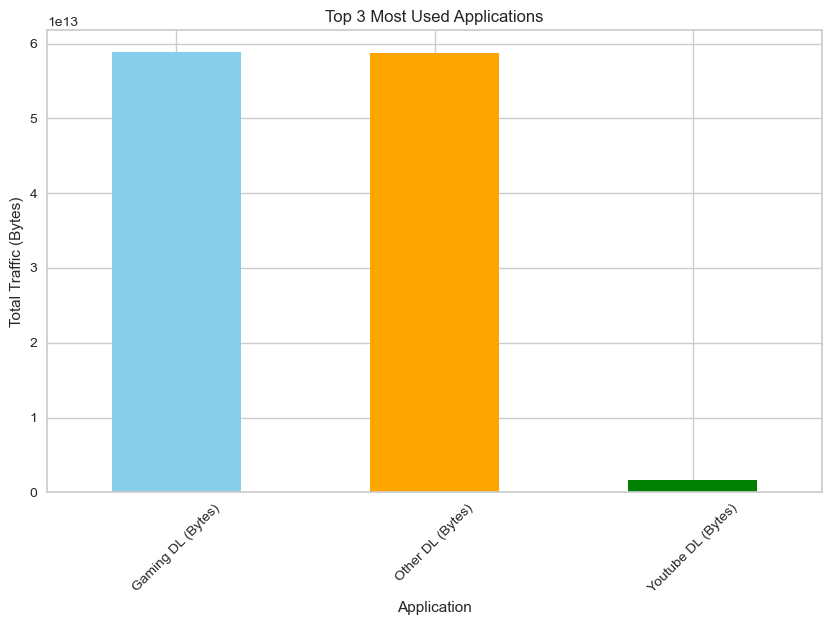

In [ ]:
analysis = TelecomEngagementAnalysis(data)
analysis.plot_top_applications()

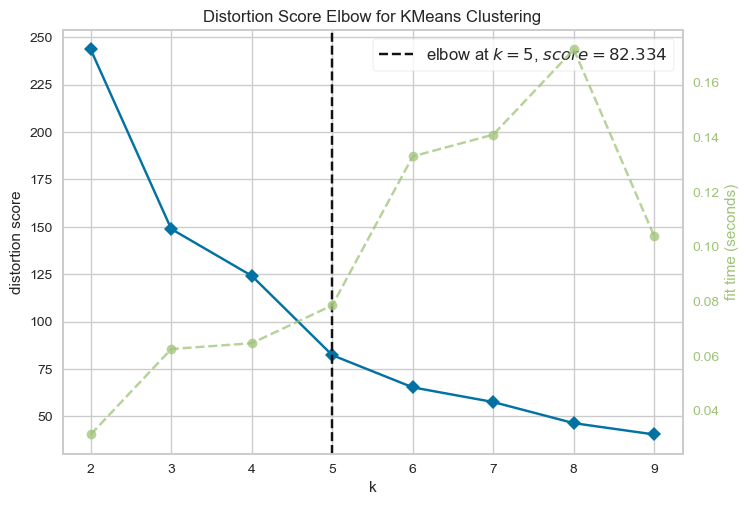

In [ ]:
analysis.find_optimal_k()

In [18]:
top_users_per_app = analysis.traffic_by_application()
print(top_users_per_app)

{'Social Media DL (Bytes)':        MSISDN/Number  Social Media DL (Bytes)
12615   3.362632e+10               42743837.0
86820   3.376054e+10               39297646.0
34563   3.365973e+10               34900444.0
5995    3.361489e+10               27749744.0
12296   3.362578e+10               26564121.0
60899   3.366716e+10               23753753.0
99055   3.378632e+10               23568655.0
66348   3.366907e+10               23477047.0
606     3.360313e+10               22776679.0
56435   3.366553e+10               22240996.0, 'Social Media UL (Bytes)':        MSISDN/Number  Social Media UL (Bytes)
12615   3.362632e+10                 630942.0
12296   3.362578e+10                 571379.0
71359   3.367588e+10                 567557.0
5995    3.361489e+10                 544800.0
34563   3.365973e+10                 511914.0
60899   3.366716e+10                 494097.0
86820   3.376054e+10                 485543.0
28594   3.365836e+10                 420146.0
99055   3.378632e+10    